In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
name = "Salida2.txt"

try:
    data = np.genfromtxt(name)
except ValueError as err:
    try:
        data = np.genfromtxt(name, skip_footer=1)
        print("Still writing...")
    except:
        raise ValueError (err)
print("Shape:", data.shape)
N = data.shape[0]

Shape: (4643, 16)


In [3]:
df = pd.DataFrame(data)
df = df.rename(columns=dict(
    zip(df.columns,
     ["s0", "o0",
     "a1", "K1", "s1", "o1", "H1",
     "a2", "K2", "s2", "o2", "H2",
     "n1", "n2",
     "t", "dt"])
    ))
df.t /= 365.2563
df.dt /= 365.2563
df["e1"] = np.sqrt(df.K1**2 + df.H1**2)
df["e2"] = np.sqrt(df.K2**2 + df.H2**2)
df["w1"] = np.arctan2(df.H1, df.K1)
df["w2"] = np.arctan2(df.H2, df.K2)
display(df)

,s0,o0,a1,K1,s1,o1,H1,a2,K2,s2,o2,H2,n1,n2,t,dt,e1,e2,w1,w2
0,0.224399,0.436332,0.050000,0.100000,628.273631,1.396275e+00,0.000008,0.200000,-0.100000,628.318562,6.981317e-01,-2.187457e-08,1.538605,0.192417,9.999999e-03,0.010000,0.100000,0.100000,0.000082,-3.141592
1,0.224399,0.436332,0.050000,0.100000,628.228703,1.396286e+00,0.000016,0.200000,-0.100000,628.318561,6.981317e-01,-3.500687e-08,1.538605,0.192417,2.000000e-02,0.010000,0.100000,0.100000,0.000165,-3.141592
2,0.224399,0.436332,0.050000,0.100000,628.183779,1.396298e+00,0.000025,0.200000,-0.100000,628.318560,6.981317e-01,-4.813916e-08,1.538605,0.192417,3.000000e-02,0.010000,0.100000,0.100000,0.000247,-3.141592
3,0.224399,0.436332,0.050000,0.100000,628.138858,1.396310e+00,0.000033,0.200000,-0.100000,628.318560,6.981317e-01,-6.127145e-08,1.538605,0.192417,4.000000e-02,0.010000,0.100000,0.100000,0.000330,-3.141592
4,0.224399,0.436332,0.050000,0.100000,628.093940,1.396321e+00,0.000041,0.200000,-0.100000,628.318559,6.981317e-01,-7.440375e-08,1.538605,0.192417,5.000000e-02,0.010000,0.100000,0.100000,0.000412,-3.141592
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4638,0.224402,0.436326,0.027144,0.010701,3.852928,1.000000e-15,-0.012626,0.202415,0.063819,0.200035,1.000000e-15,-7.519247e-02,3.846606,0.188985,5.545569e+09,8.188719,0.016551,0.098624,-0.867756,-0.867037
4639,0.224402,0.436326,0.026168,0.002557,4.069884,1.000000e-15,0.015714,0.202414,0.015708,0.199990,1.000000e-15,9.714803e-02,4.063704,0.188985,5.579547e+09,7.500848,0.015921,0.098410,1.409475,1.410494
4640,0.224402,0.436325,0.024964,-0.014177,4.367206,1.000000e-15,-0.005332,0.202414,-0.091803,0.199933,1.000000e-15,-3.469436e-02,4.361203,0.188985,5.613733e+09,4.521781,0.015146,0.098140,-2.781856,-2.780262
4641,0.224403,0.436324,0.023369,-0.011504,4.820984,1.000000e-15,-0.008196,0.202414,-0.079461,0.199858,1.000000e-15,-5.696911e-02,4.815219,0.188985,5.648129e+09,3.011911,0.014125,0.097773,-2.522570,-2.519588


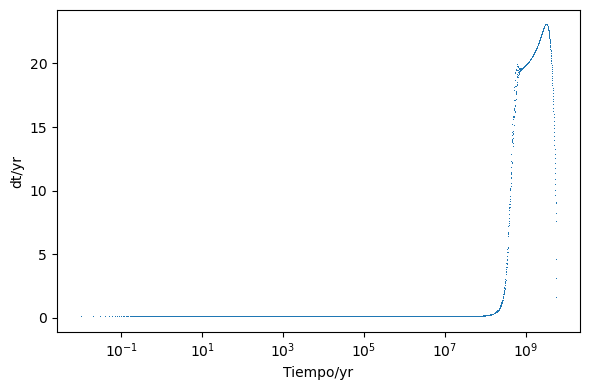

In [4]:
plt.figure(dpi=100)
plt.plot(df.t, df.dt, ',')
plt.xlabel("Tiempo/yr")
plt.ylabel("dt/yr")
plt.semilogx()
plt.tight_layout()
plt.show()

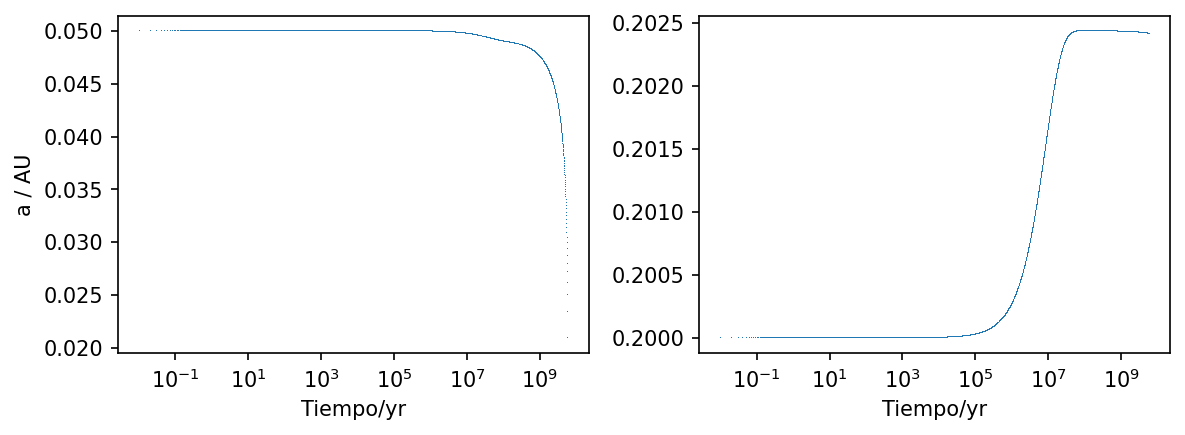

In [5]:
plt.figure(dpi=150, figsize=(8,3))
plt.subplot(1,2,1)
plt.plot(df.t, df.a1, ',')
plt.xlabel("Tiempo/yr")
plt.ylabel("a / AU")
plt.semilogx()
plt.subplot(1,2,2)
plt.plot(df.t, df.a2, ',')
plt.xlabel("Tiempo/yr")
plt.semilogx()
plt.tight_layout()
plt.show()

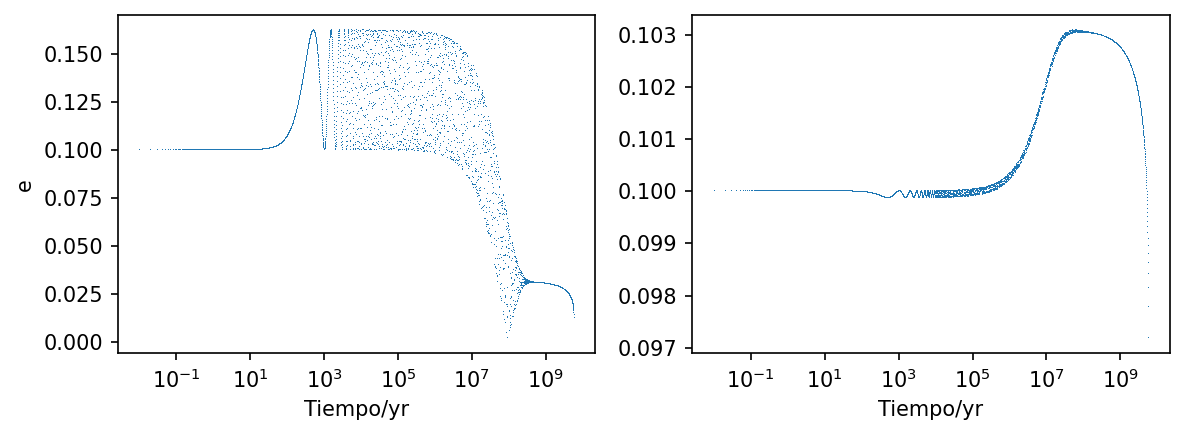

In [6]:
plt.figure(dpi=150, figsize=(8,3))
plt.subplot(1,2,1)
plt.plot(df.t, df.e1, ',')
plt.xlabel("Tiempo/yr")
plt.ylabel("e")
plt.semilogx()
plt.subplot(1,2,2)
plt.plot(df.t, df.e2, ',')
plt.xlabel("Tiempo/yr")
plt.semilogx()
plt.tight_layout()
plt.show()

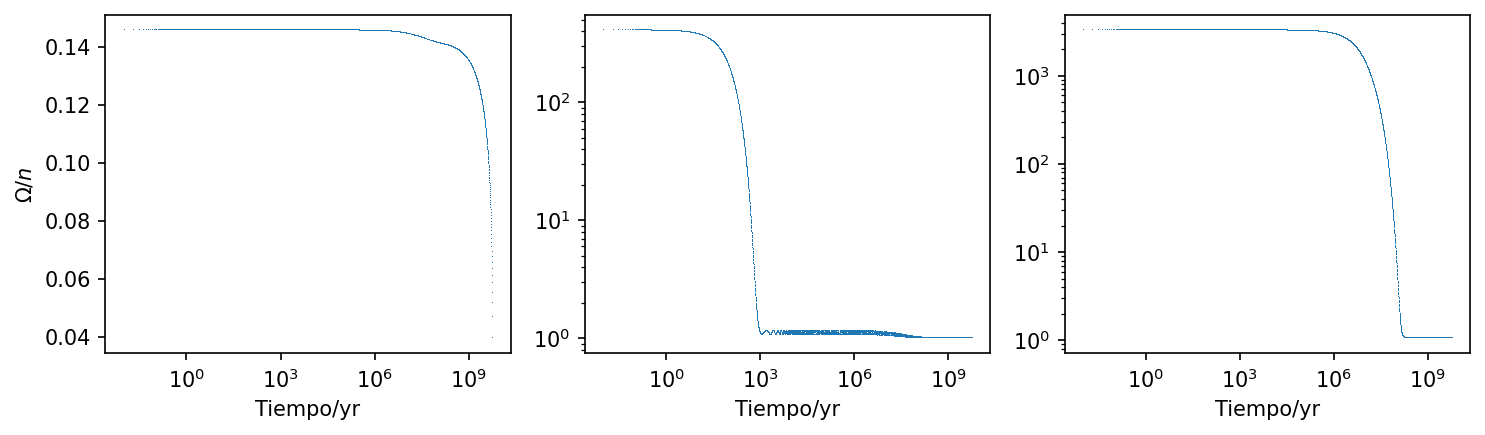

In [7]:
plt.figure(dpi=150, figsize=(10,3))
plt.subplot(1,3,1)
plt.plot(df.t, df.s0/df.n1, ',')
plt.xlabel("Tiempo/yr")
plt.ylabel("$\Omega / n$")
plt.semilogx()
plt.subplot(1,3,2)
plt.plot(df.t, df.s1/df.n1, ',')
plt.xlabel("Tiempo/yr")
plt.semilogx()
plt.semilogy()
plt.subplot(1,3,3)
plt.plot(df.t, df.s2/df.n2, ',')
plt.xlabel("Tiempo/yr")
plt.semilogx()
plt.semilogy()
plt.tight_layout()
plt.show()

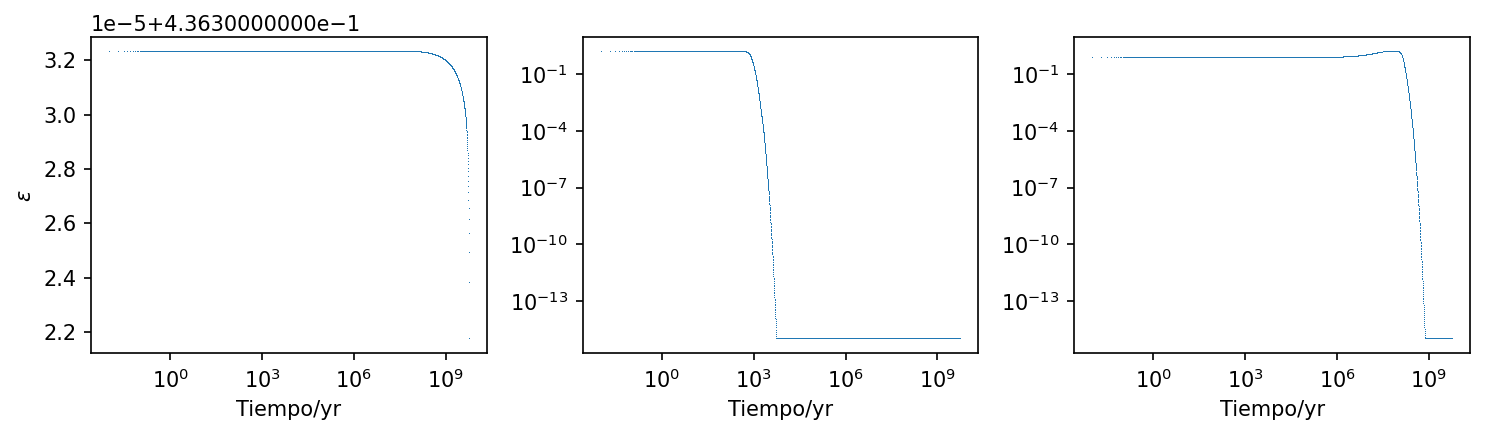

In [8]:
plt.figure(dpi=150, figsize=(10,3))
plt.subplot(1,3,1)
plt.plot(df.t, df.o0, ',')
plt.xlabel("Tiempo/yr")
plt.ylabel("$\epsilon$")
plt.semilogx()
plt.subplot(1,3,2)
plt.plot(df.t, df.o1, ',')
plt.xlabel("Tiempo/yr")
plt.semilogx()
plt.semilogy()
plt.subplot(1,3,3)
plt.plot(df.t, df.o2, ',')
plt.xlabel("Tiempo/yr")
plt.semilogx()
plt.semilogy()
plt.tight_layout()
plt.show()

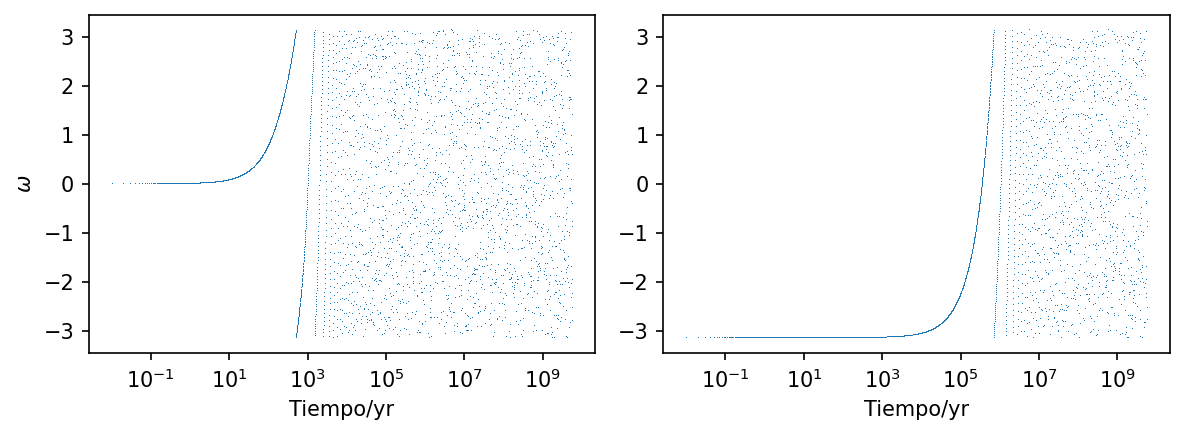

In [9]:
plt.figure(dpi=150, figsize=(8,3))
plt.subplot(1,2,1)
plt.plot(df.t, df.w1, ',')
plt.xlabel("Tiempo/yr")
plt.ylabel("$\omega$")
plt.semilogx()
plt.subplot(1,2,2)
plt.plot(df.t, df.w2, ',')
plt.xlabel("Tiempo/yr")
plt.semilogx()
plt.tight_layout()
plt.show()

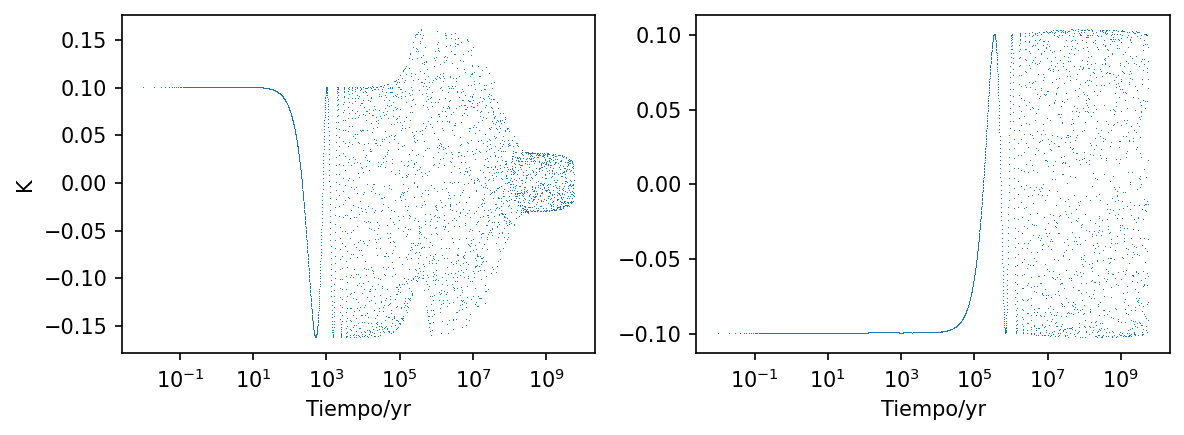

In [10]:
plt.figure(dpi=150, figsize=(8,3))
plt.subplot(1,2,1)
plt.plot(df.t, df.K1, ',')
plt.semilogx()
plt.xlabel("Tiempo/yr")
plt.ylabel("K")
plt.subplot(1,2,2)
plt.plot(df.t, df.K2, ',')
plt.semilogx()
plt.xlabel("Tiempo/yr")
plt.tight_layout()
plt.show()

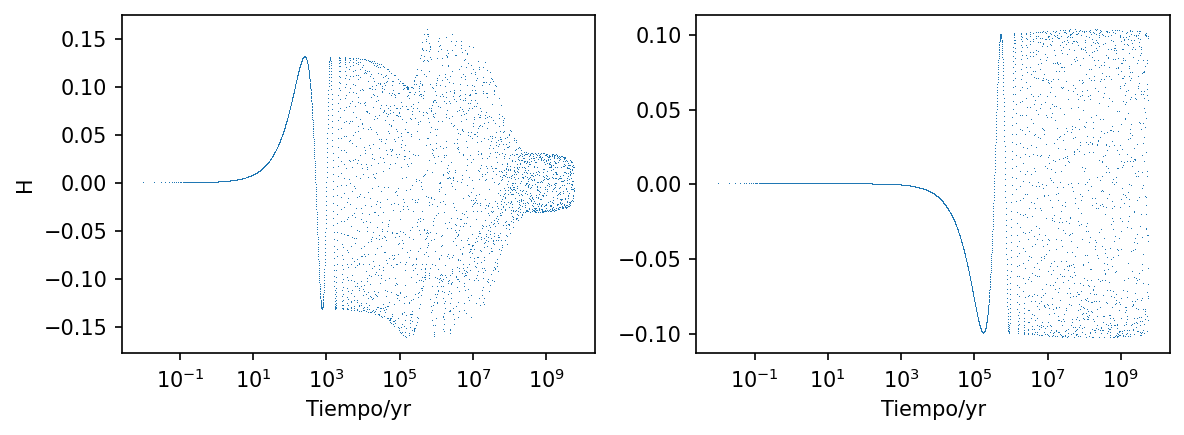

In [11]:
plt.figure(dpi=150, figsize=(8,3))
plt.subplot(1,2,1)
plt.plot(df.t, df.H1, ',')
plt.semilogx()
plt.xlabel("Tiempo/yr")
plt.ylabel("H")
plt.subplot(1,2,2)
plt.plot(df.t, df.H2, ',')
plt.semilogx()
plt.xlabel("Tiempo/yr")
plt.tight_layout()
plt.show()

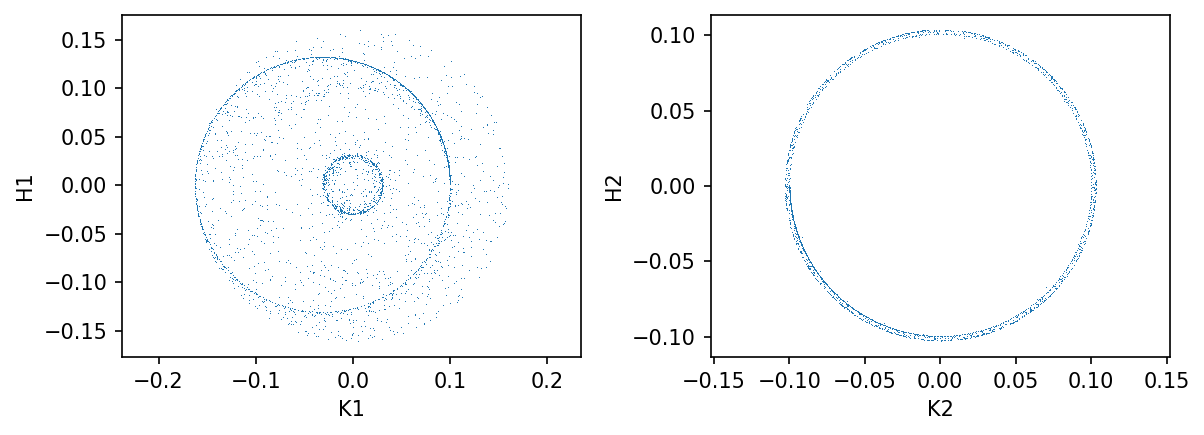

In [12]:
plt.figure(dpi=150, figsize=(8,3))
plt.subplot(1,2,1)
plt.plot(df.K1, df.H1, ',')
plt.xlabel("K1")
plt.ylabel("H1")
plt.axis("equal")
plt.subplot(1,2,2)
plt.plot(df.K2, df.H2, ',')
plt.xlabel("K2")
plt.ylabel("H2")
plt.axis("equal")
plt.tight_layout()
plt.show()